In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [2]:
#liste des fichiers du dataset 
files = os.listdir("./datset/")
files[:5]

['100_0_0_20170112213500903.jpg',
 '100_0_0_20170112215240346.jpg',
 '100_1_0_20170110183726390.jpg',
 '100_1_0_20170112213001988.jpg',
 '100_1_0_20170112213303693.jpg']

In [3]:
#creer des tableaux pour suvegarder les images l'age ..
age_tab=[]
file_path=[]
file_name=[]
image_array=[]
labels=[]
path="./datset/"

for i in tqdm(range(len(files))):
    age=int(files[i].split("_")[0])
    
    if(age<=100):
        #eliminer les ages de plus de 100
        age_tab.append(age)
        file_path.append(path+files[i])
        labels.append([age])
        image=cv2.imread(path+files[i])
        image=cv2.resize(image,(96,96))
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image_array.append(image)
        

100%|███████████████████████████████████████████████████████████████████████████| 24108/24108 [03:54<00:00, 102.96it/s]


In [4]:
a,b = np.unique(age_tab,return_counts="True" )

Text(0.5, 1.0, "groupe d'age")

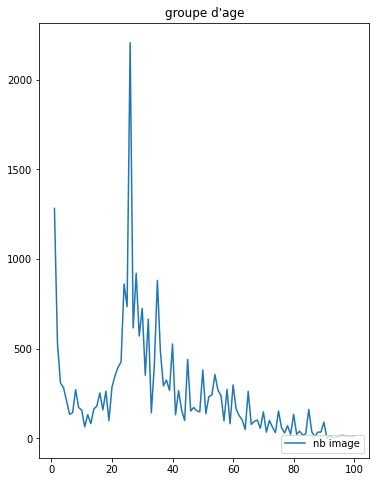

In [8]:
plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)
plt.plot(a, b, label='nb image')
plt.legend(loc='lower right')
plt.title("groupe d'age")

In [92]:
b


array([1282,  531,  308,  283,  209,  134,  143,  272,  172,  158,   65,
        132,   82,  164,  180,  253,  159,  263,   99,  285,  349,  396,
        426,  861,  735, 2206,  616,  921,  571,  725,  352,  665,  143,
        410,  881,  483,  293,  325,  268,  526,  132,  266,  158,  100,
        440,  153,  172,  154,  148,  381,  138,  232,  242,  356,  269,
        239,   98,  273,   82,  298,  164,  127,  103,   50,  262,   78,
         95,  102,   56,  148,   35,  100,   63,   32,  153,   60,   30,
         71,   23,  134,   23,   40,   18,   26,  161,   36,   11,   35,
         35,   90,    2,   13,    5,   10,   17,    9,   12], dtype=int64)

les groupes d'age de plus de 100 ans ont un effectif faible ce qui va réduire l'accuracy de notre model pour cela on les éliminent 

In [4]:
image_array =np.array(image_array)
image_array

array([[[[ 70,  74,  83],
         [ 71,  75,  84],
         [ 74,  78,  87],
         ...,
         [ 79,  83,  92],
         [ 77,  81,  90],
         [ 77,  81,  90]],

        [[ 67,  71,  80],
         [ 71,  75,  84],
         [ 74,  78,  87],
         ...,
         [ 79,  83,  92],
         [ 79,  83,  92],
         [ 76,  80,  89]],

        [[ 73,  77,  86],
         [ 66,  70,  79],
         [ 72,  76,  85],
         ...,
         [ 79,  83,  92],
         [ 79,  83,  92],
         [ 79,  83,  92]],

        ...,

        [[171, 170, 176],
         [174, 173, 179],
         [178, 177, 183],
         ...,
         [171, 171, 171],
         [177, 177, 177],
         [185, 185, 187]],

        [[171, 170, 176],
         [166, 165, 171],
         [171, 170, 176],
         ...,
         [167, 167, 167],
         [170, 170, 170],
         [174, 174, 175]],

        [[173, 172, 178],
         [169, 168, 174],
         [171, 170, 176],
         ...,
         [160, 160, 160],
        

In [5]:
labels = np.array(labels)
labels


array([[100],
       [100],
       [100],
       ...,
       [  9],
       [  9],
       [  9]])

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(image_array,labels,test_size=0.2)

In [ ]:
image_array

# CNN MODEL

In [169]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(96, 
                                                              96,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)
model = tf.keras.Sequential([data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(96,96, 3)),
                    layers.Conv2D(32, 3, padding="same", activation="relu"),
                    layers.BatchNormalization(),
                    layers.MaxPooling2D(pool_size=(2,2)),
                    layers.Dropout(0.4),

                    layers.Conv2D(64, 3, padding="same" ,activation="relu"),
                    layers.Conv2D(128, 3, padding="same" ,activation="relu"),
                    layers.BatchNormalization(),
                    layers.MaxPooling2D(pool_size=(2,2)),
                    layers.Conv2D(256, 3, padding="same" ,activation="relu"),
                    layers.Conv2D(512, 3, padding="same" ,activation="relu"),
                    layers.BatchNormalization(),
                    layers.MaxPooling2D(pool_size=(2,2)),
                    layers.Dropout(0.3),
        

                    layers.Flatten(),
                    layers.Dense(1024,activation='relu',kernel_regularizer=L2(l2=0.05)),
                    layers.Dense(512,activation='relu',kernel_regularizer=L2(l2=0.05)),
                    layers.Dense(128,activation='relu',kernel_regularizer=L2(l2=0.05)),
                    layers.Dropout(0.2),
                    
                    layers.Dense(1)
                   ])

model.compile(optimizer='adam',
              loss=["mean_squared_error"],
              metrics=['mae'])
model.summary(§§

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_16 (Sequential)   (None, 96, 96, 3)         0         
_________________________________________________________________
rescaling_12 (Rescaling)     (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 64)      

In [222]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.9,
                                              monitor="val_loss",
                                              mode="auto",
                                              cooldown=0,
                                              patience=5,
                                              varbose=1,
                                              min_lr=1e-5)

In [223]:
ckp_path="trained_model/model"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=ckp_path,monitor='val_loss',save_best_only=True,save_weights_only=True)

In [224]:
EPOCHS=15
BATCH_SIZE=256
history=model.fit(X_train, Y_train,
                 validation_data=(X_test,Y_test),
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 callbacks=[model_checkpoint,reduce_lr])

Epoch 1/15
76/76 [==============================] - 1134s 15s/step - loss: 309.7203 - mae: 11.6831 - val_loss: 584.6440 - val_mae: 16.9083
Epoch 2/15
76/76 [==============================] - 1092s 14s/step - loss: 299.5030 - mae: 11.4789 - val_loss: 413.5264 - val_mae: 14.9524
Epoch 3/15
76/76 [==============================] - 1092s 14s/step - loss: 291.1593 - mae: 11.2704 - val_loss: 572.6448 - val_mae: 19.0060
Epoch 4/15
76/76 [==============================] - 1096s 14s/step - loss: 281.9029 - mae: 11.1127 - val_loss: 362.2496 - val_mae: 13.6827
Epoch 5/15
76/76 [==============================] - 1092s 14s/step - loss: 273.1561 - mae: 10.9266 - val_loss: 265.7314 - val_mae: 10.3661
Epoch 6/15
76/76 [==============================] - 1089s 14s/step - loss: 266.4511 - mae: 10.7773 - val_loss: 961.0563 - val_mae: 25.7949
Epoch 7/15
76/76 [==============================] - 1107s 15s/step - loss: 259.4626 - mae: 10.6197 - val_loss: 528.6744 - val_mae: 17.3247
Epoch 8/15
76/76 [=========

In [225]:
model.save("age5.h5")

In [196]:
history.history

{'loss': [465.41546630859375,
  441.05133056640625,
  421.1538391113281,
  397.957763671875,
  382.8138427734375],
 'mae': [13.939377784729004,
  13.593920707702637,
  13.384111404418945,
  12.952661514282227,
  12.770746231079102],
 'val_loss': [533.1507568359375,
  703.8905639648438,
  618.294677734375,
  1508.6112060546875,
  587.8029174804688],
 'val_mae': [16.337907791137695,
  20.00581169128418,
  18.887500762939453,
  32.69594955444336,
  17.941585540771484]}

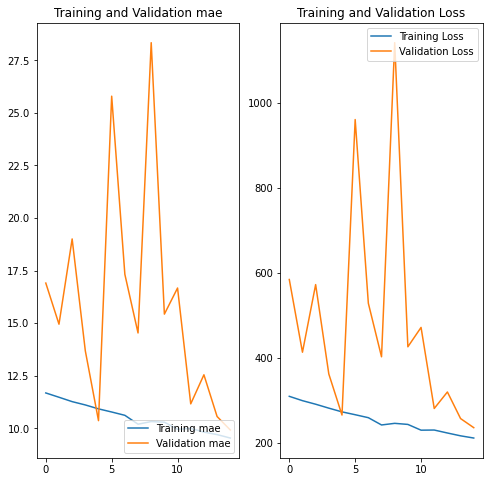

In [226]:
mae = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training mae')
plt.plot(epochs_range, val_mae, label='Validation mae')
plt.legend(loc='lower right')
plt.title('Training and Validation mae')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

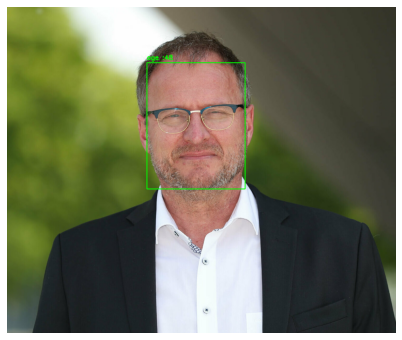

In [4]:
import tensorflow as tf
import cvlib as cv
model = tf.keras.models.load_model("age5.h5")
image_path = "img.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imge = cv2.resize(img, (96, 96))
imge = np.array(imge)
imge = np.expand_dims(imge, 0)
cf = model.predict(imge)
label = str(int(cf[0]))
score = tf.nn.softmax(cf[0])
idx = 100 * np.max(score)
label = "age :"+label 
face, confidence = cv.detect_face(img)
for  f in face :
    (startX, startY)=f[0], f[1]
    (endX, endY)= f[2], f[3]
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)
    try :
        face_crop = np.copy(img[startY:endY,startX:endX])
        face_crop = cv2.resize(face_crop, (50,50))
        face_crop = np.array(face_crop)
        face_crop = np.expand_dims(face_crop, 0)
    except Exception as e:
        print(str(e))
    Y = startY - 10 if startY - 10 > 10 else startY + 10
    break
cv2.putText(img, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")
plt.show()
